# Introduction to Probability Theory

## Code Preamble

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../py')

from plots import (
    plot_4_marbles_with_replacement, 
    plot_4_marbles_without_replacement
)

In [3]:
%%HTML

<style>
  .circle {
    display: inline-flex;
    width: 8px;
    height: 8px;
    border-radius: 50%;
    border: 1px solid black;
    margin-right: 5px; /* Optional: Add some spacing between the circles and the text */
  }

  .white-circle {
    background-color: white;
    align-items: center;
    justify-content: center;
  }

  .blue-circle {
    background-color: blue;
    align-items: center;
    justify-content: center;
  }
</style>

## Useful resources

### Textbooks:

- McElreath, R. (2020): [Statistical Re-Thinking](https://github.com/rmcelreath/stat_rethinking_2023). CRC Press.
- Manning, C. H. Scütze (1999): [Foundations of Statistical Natural Language Processing](http://libgen.rs/book/index.php?md5=E0FD4C5EAE1BFBB749661E8D043656A3). MIT Press.
- D. Wackerly, W. Mendenhall & R. Scheaffer (2008). [Mathematical Statistics with Applications](http://libgen.rs/book/index.php?md5=8B47837EC4907BBAEAA1ADEBFCA135C6). 7th Ed. Brooks/Cole.

In [4]:
%%HTML

<center>
<video width="960" height="420" controls>
  <source src="../vid/chatgpt_on_language_events.mp4" type="video/mp4">
</video>
</center>

### Language Models Are Machines for Conditional Probability Generation

- Language models predict characters, words, tokens, based on their **conditional probabilities**


**PROMPT:** What is conditional probability?

- Before we can dive into the world of language modeling, we need to understand the basics of probability theory.
- Let's take one step back and do just that!

## 1. The Experiment and the Event

### 1.1. Experiment, Sample Space, Outcome

- Probability theory starts with predicting how likely it is that something will happen, formalized through the notion of the *experiment*. 
- For any given experiment, there are a number of *basic outcomes* or *simple events*. 
    - For example, tossing a fair coin constitutes an experiment with two basic outcomes, heads $(H)$ or tails $(T)$.
- These two basic outcomes constitute our sample space $S$. 
- The concepts "basic outcome", "simple event", and "sample point" are essentially synonymous. 

**PROMPT** for our sample space $S$, what are the possibe events?

What this notation states is that the sample space $S$ consists of the set of basic outcomes $H, T$. "Set" here is signalled by the curly braces {}.

### 1.2. Disjoint events

- The set of events that constitute a sample space have to be *mutually exclusive*. 
- One experiment can't result in both $T$ and $H$. 
    - The events are **disjoint**. 

In mathematical notation we would write that:
    
$$
\displaylines{
H \cap T = \emptyset \\
H \cup T = S
}
$$

The first line says that "$H$ **and** $T$" form the empty set, $\emptyset$. There are no events in this set. The second line says that "$H$ **or** $T$" constitute entire the sample space $S$. 

These symbols are easier to remember if we note that the first one looks like an A so it stands for "and":

$$
\displaylines{
\cap : \text{"and"} \\
\cup : \text{"or"}
}
$$

But how do we move on from here to actually calculating probabilities? Let's start with an easy question:

- If the coin is indeed fair, what is the probability that our toss results in heads? 

The answer might seem obvious, but let's dwell on it for a minute.

Let $A$ be the *event* that our experiment results in heads ($H$). 
- Now $A$ is a subset of our sample space $S$. 
- $A$ contains one basic outcome ($H$)
- $S$ contains two basic outcomes ($H, T$). 
- So to calculate the probability of $P$ of $A$ we take the size of $A$ divided by the size of $S$. 

The mathematical notation for this is:

$$
P(A) = \frac{\vert A \vert}{\vert S \vert} = \frac{1}{2} = 0.5
$$

Here $P(A)$ represents the "probability of $A$" and $\vert A \vert$ and $\vert S \vert$ the size of $A$ and $S$ respectively. 

A less mathematical way of writing the same thing would be:

$$
P(A) = \frac{\text{number of outcomes in event } A}{\text{number of outcomes in the sample space } S} = \frac{1}{2} = 0.5
$$

However, it is good to know this basic notation!

Taking these ideas, we can also see why the probability of the empty set and the sample space must be $0$ and $1$, respectively:

$$
    \begin{equation}
        \displaylines{
P(H \cap T) = \frac{0}{1} = 0 = \emptyset \\
P(H \cup T) = \frac{1}{1} = 1 = S
        }
    \end{equation}
$$

It is **impossible** to have *both* heads *and* tails in one throw, but it is **certain** to have *either* heads *or* tails in the same experiment.

## Counting, counting, counting

- So to know probabilities, we need to do a LOT of counting. 
- What are we counting then? 
    - Well, the basic outcomes of the sample space and the events we are interested in.

At first glance, it might seem like *basic outcome* and *event* are synonymous. However, imagine that we instead toss the coin three times. 

**PROMPT:** What is the sample space?

Keeping track of all these letters can get tricky, so let's introduce some notation to make things easier. If we have $N$ basic events, then we can use the letter $E$ with the index $i$ to keep track of them. Like this:

$$
E_i : \text{Event } i \text{ out of some N number of possible events}\\
$$

For our coin tossing experiment, we could write:

$$
E_1 : HHH \hspace{1cm}
E_2 : HHT \hspace{1cm}
E_3 : HTH \hspace{1cm}
E_4 : HTT \\
E_5 : THH \hspace{1cm}
E_6 : THT \hspace{1cm}
E_7 : TTH \hspace{1cm}
E 8 : TTT
$$

Now our sample space can be written more consisely:

$$
S : \{E_1, E_2, E_3, E_4, E_5, E_6, E_7, E_8\}
$$

How many basic outcomes are there? Well, we can just count and find out that:
    
$$\vert S \vert = 8$$

So there are 8 *basic outcomes* or *simple events*. The $\vert$ symbols around the $S$ express that it's the size of the set.

**PROMPT 1:** What is the likelihood of the *compound event* $A$ that we get *two or more heads*?

To unpack this question, let's start by defining the set of basic outcomes associated with the event.

**PROMPT 1A:** What are the basic outcomes of A?

**PROMPT 1B:** How many simple events are there in $A$?

**PROMPT 1C:** So now, what is the probability of $A$?

**PROMPT 2:** What is the probability of the *compound event* $B$ that we get exactly two heads?

## Independence of Events

An important distinction in statistical thinking is whether events are **independent** or **dependent** of each other. Are our coin tosses independent or dependent? Let's approach the question with an example.

**PROMPT 3:** What is the probability that the 100th throw is heads?

**PROMPT 4:** What would the probability of getting 100 heads after each other be?

**PROMPT 5:** But what if wanted to ask ourselves what the probability was of getting two heads and then a tails?

So far so good. But things get more tricky if we are dealing with events that don't have the same probability. Let's say our coin was biased and we knew it shows heads 60% of the time and tails 40% of the time. 

**PROMPT 6:** What would the probability be of getting heads the five first tosses out of 10 and tails for the rest?

Because the two events are independent, we just multiply them. We can generalize this rule. For two independent event $A$ and $B$, their *joint probability* is:
    
$$
P(A, B) = P(A \cap B) = P(A)P(B)
$$

We can generalize this to a very large number of events using the following notation: $\Pi_i^N P(E_i)$

The scary looking symbol $\Pi^N_i$ just means that we go over N probabilities and multiply each with the previous one. It's like a for-loop for multiplication!

Finally, what if our event space consisted of many disjoint events, that by themselves consisted of joint probabilities? 

Let's go back to the event $B$ from the previous section, where we asked for the probability of getting exactly two heads in three tosses. Remember, $B$ consisted of the set of events $\{E_2, E_3, E_5 \}$. Above we used counts to calculate the probabilities for those events, but we could also use the joint probability for each $E_i$:

$$
\begin{equation} 
    \begin{aligned}P(B) =
&\overbrace{P(H) \times P(H) \times P(T)}^{E_2} \; + \\ 
&\overbrace{P(H) \times P(T) \times P(H)}^{E_3} \; + \\ 
&\overbrace{P(T) \times P(H) \times P(H)}^{E_5} =
0.5^3 + 0.5^3 + 0.5^3 =  
3 \times 0.5^3 = 0.375
\end{aligned}
\end{equation}
$$ 

## Conditional Probability

But how would we proceed if the events actually influenced each other? Let's move on from coin flips and consider another type of experiment. 

Suppose there's a bag, and it contains four marbles. These marbles come in two colors: blue [ <span class="circle blue-circle"></span>] and white [ <span class="circle white-circle"></span>]. Two marbles are blue, two are white { <span class="circle blue-circle"></span> <span class="circle blue-circle"></span> <span class="circle white-circle"></span> <span class="circle white-circle"></span>} . If we draw a blue marble, how likely is it that the next marble is white?

Let's get a sense of the problem by drawing a graph containing all the possible choices, "a garden of forking data".

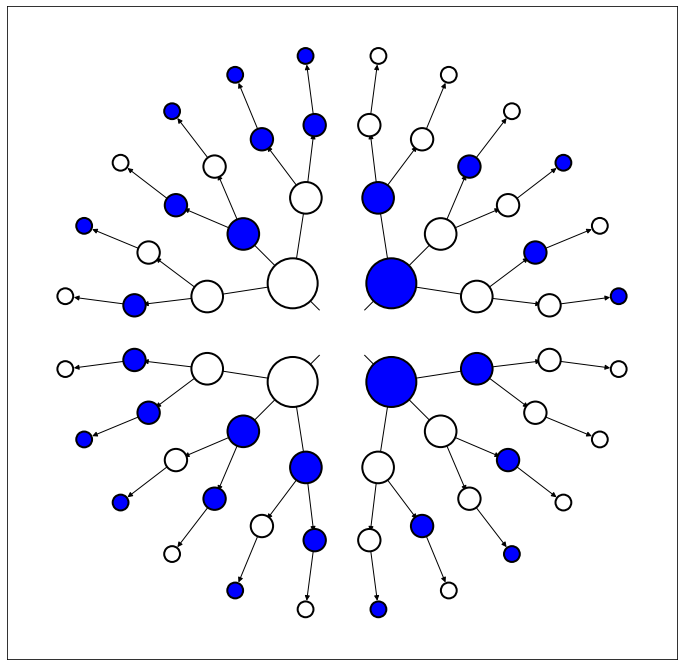

In [5]:
plot_4_marbles_without_replacement()

When we draw the first marble, there are four basic events. 
- Either we draw one of the two white marbles or we draw one of the two blue marbles. 
- So the probability of drawing any of the two blue marbles is $0.5$. 
    
We already know how to formalize this. Our basic events are:

$$
S_1 = \{blue_1, blue_2, white_3, white_4\}
$$

So then size of our compound events are:

$$
\vert S_1 \vert = 4 \\
\vert blue_i \vert = 2
$$

$$
P(blue_i) = \frac{\vert blue_i \vert}{\vert S_1 \vert} = \frac{2}{4} = \frac{1}{2}
$$ 

**PROMPT 7:** How do we calculate the probability that the next marble is white? What is $S$ at this point? 

You might notice that we wrote the last probability a bit differently than before. What does $P(white \vert blue)$ signify? Well, it's just notation that says "white given blue", i.e. "white conditional on us having already chosen blue". We call this the **conditional probability**.

**PROMPT 8:** How do we now calculate the probability of drawing a blue first, and then a white?

We are now ready to generalize and state something new about **joint probability**. The probability the mutually **dependent** events $A$ and $B$ can be written as follows:

$$
P(A \cap B) = P(B)P(A \vert B) = P(A)P(B \vert A)
$$

Consequently, we can also write the **conditional probability**  of these mutually dependent events like this:

$$
P(A \vert B) = \frac{P(A \cap B)}{P(B)}
$$

**PROMPT 9:** What if $A$ and $B$ are mutually **independent**. What are their conditional probabilities in that case?

**PROMPT 10:** How do we now calculate the probability of drawing a blue, white, and blue marble, in that order? Write the answer using mathematical notation.

## The Chain Rule of Probability

As we saw in the last prompt, more and more events can be appended to the chain of probabilities. We can generalize this as the so called **Chain Rule of Probability:**

$$
\begin{equation}
\begin{aligned}
&P(A_1 \cap A_2 \cap A_3 \cap ... \cap A_n) = \\
&P(A_1) \cdot P(A_2 \vert A_1) \cdot P(A_3 \cap \vert A_1 \cap A_2) \cdot ... \cdot P(A_n \vert A_1 \cap ... \cap A_{n-1}) = \\
&P(A_1) \prod_{j=2}^n P(A_j \vert A_1 \cap ...\cap A_{j-2})
\end{aligned}
\end{equation}
$$

This assumption is at the foundation of modelling almost any complex sequence, including language.

**PROMPT:** We randomly draw 4 cards without replacement from deck of skat with 52 cards. What is the probability that we have picked 4 aces? Use the chain rule of probability.

## From Knowing to Infering

So far we have made a very strong assumption. 
- Namely, we've assumed we know all the events in our set of possibilities. 
    - We knew our coin was unbiased. 
    - We knew how many white and blue marbles we had. 
    
But what if we didn't have this information?

Let's take an example from the book Statistical Rethinking by Richard McElreath, an anthropologist who wrote a textbook in stats for people without any background in Math or programming! McElreath is who I got the marble example from, except in his book we do *not* know how many marbles there are. Instead, we know there are five possibilities, or *conjectures*:


1. { <span class="circle white-circle"></span> <span class="circle white-circle"></span> <span class="circle white-circle"></span> <span class="circle white-circle"></span>}
2. { <span class="circle blue-circle"></span> <span class="circle white-circle"></span> <span class="circle white-circle"></span> <span class="circle white-circle"></span>}
3. { <span class="circle blue-circle"></span> <span class="circle blue-circle"></span> <span class="circle white-circle"></span> <span class="circle white-circle"></span>} 
4. { <span class="circle blue-circle"></span> <span class="circle blue-circle"></span> <span class="circle blue-circle"></span> <span class="circle white-circle"></span>} 
5. { <span class="circle blue-circle"></span> <span class="circle blue-circle"></span> <span class="circle blue-circle"></span> <span class="circle blue-circle"></span>} 

Furthermore, every time we pull a marble, we *put it back*. In statistics, this is called **sampling *with* replacement** whereas what we did before with the marbles is called **sampling *without* replacement**.

Now we pull three marbles from the bag. 

The sequence that emrges is: <span class="circle blue-circle"></span> <span class="circle white-circle"></span> <span class="circle blue-circle"></span>, in that order. *These are our data*.

**Our goal:** Figure out which conjencture is the most likely, given this data.

**PROMPT:** Which combinations of marbles could've produced this data?

Notice also that even though the three white marbles look the same from a data perspective—we just record the color of the marbles, after all—they are really different events. This is important, because it means that there are three more ways to see <span class="circle white-circle"></span> than <span class="circle blue-circle"></span>.

Let's begin by considering just the single conjecture, { <span class="circle blue-circle"></span> <span class="circle white-circle"></span> <span class="circle white-circle"></span> <span class="circle white-circle"></span>}, i.e. that the bag contains one blue and three white marbles.

**PROMPT:** How many ways could we have drawn  <span class="circle blue-circle"></span> <span class="circle white-circle"></span> <span class="circle blue-circle"></span>, if the four marbles in the bag are { <span class="circle blue-circle"></span> <span class="circle white-circle"></span> <span class="circle white-circle"></span> <span class="circle white-circle"></span>}?

It's actually a tricky question, so let's visualize!

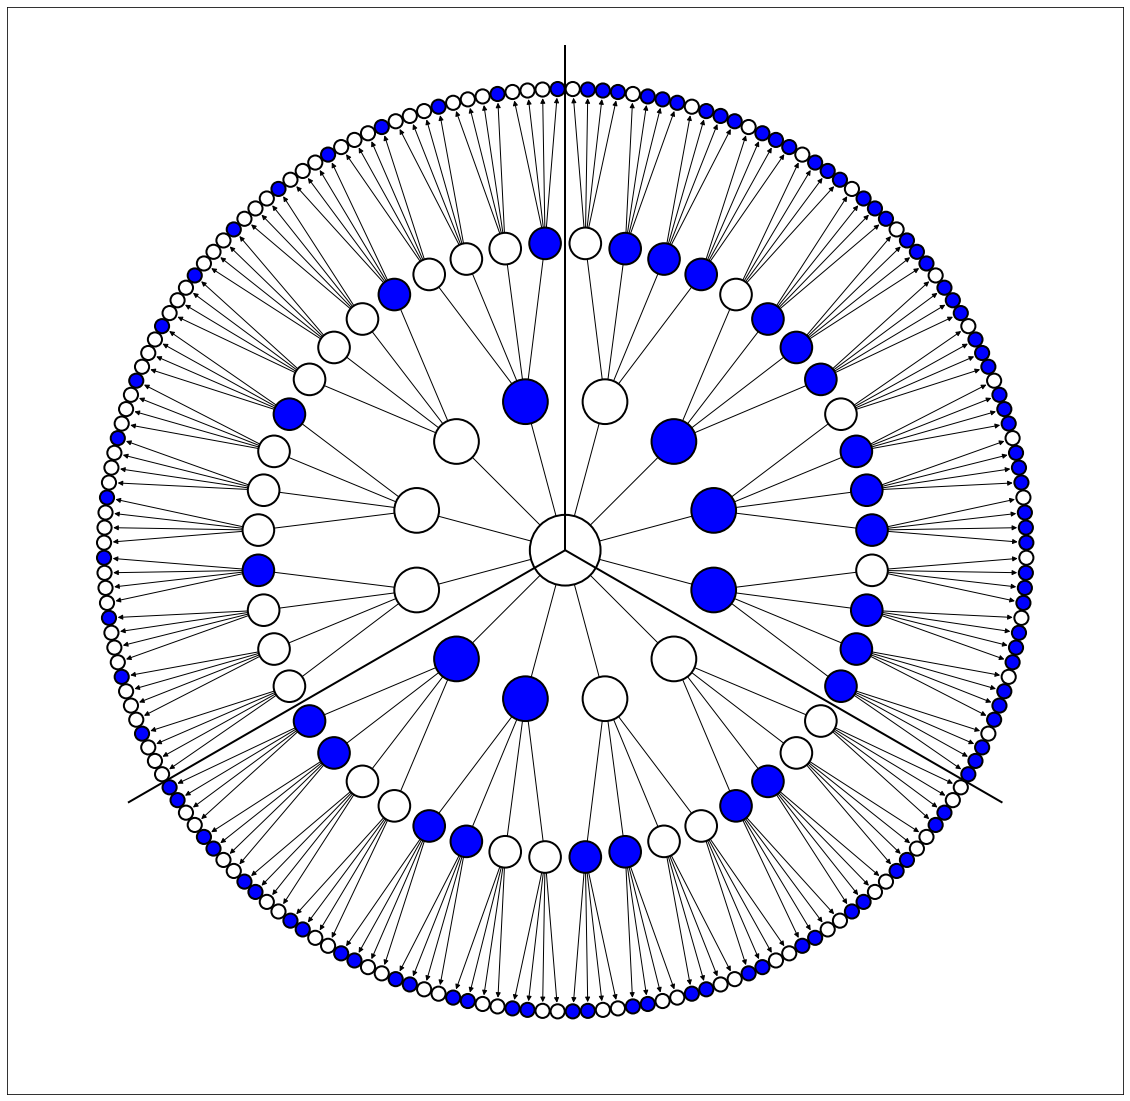

In [53]:
plot_4_marbles_with_replacement()

At each layer, we just ask: How many choices do we have here? Then we move on the the next and ask again. Finally we multiply. So, in our case:

$$
1 \times 3 \times 1 = 3
$$

We can repeat this for each conjecture.

**PROMPT:** How many ways can we produce the marbles for the other conjectures:
    
{ <span class="circle blue-circle"></span> <span class="circle blue-circle"></span> <span class="circle white-circle"></span> <span class="circle white-circle"></span>} 

{ <span class="circle blue-circle"></span> <span class="circle blue-circle"></span> <span class="circle blue-circle"></span> <span class="circle white-circle"></span>} 

**PROMPT:** WHat are $P(A_2)$ and $P(A_3)$